# neural network on dataset attributes based on domain URL (table 2)

### (21 features)

In [1]:
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import *
from keras import callbacks
from keras.utils.np_utils import *

print("Done Loading")


Done Loading


In [2]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [3]:
y = full_df['phishing']

features_table1 = ['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
                   'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain',
                   'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain'] 

X = full_df[features_table1]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=808)

train_X.head()

,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain
5676,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,0,0
39002,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13,0,0
1732,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0
39668,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,26,0,0
82035,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,28,0,0


In [4]:
X.shape

(88647, 21)

In [5]:
tf.keras.backend.clear_session()

#neural net

table2_nn = keras.Sequential([
                          layers.InputLayer(input_shape=[21]),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=50, activation='relu'),
                          layers.Dropout(0.20),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=21, activation='relu'),
                          layers.Flatten(),
                          layers.Dense(units=1, activation='sigmoid')
])

table2_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(), 
             tf.keras.metrics.AUC(),
             ]
)

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)


table2_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [6]:
history = table2_nn.fit(train_X, train_y, validation_split=0.30, batch_size= 15, epochs=500, callbacks = [earlystopping])

Epoch 1/500
3103/3103 [==============================] - 9s 3ms/step - loss: 0.6511 - binary_accuracy: 0.6466 - auc: 0.5472 - val_loss: 0.6040 - val_binary_accuracy: 0.6592 - val_auc: 0.7198
Epoch 2/500
3103/3103 [==============================] - 7s 2ms/step - loss: 0.5955 - binary_accuracy: 0.6638 - auc: 0.7037 - val_loss: 0.5761 - val_binary_accuracy: 0.7157 - val_auc: 0.7307
Epoch 3/500
3103/3103 [==============================] - 8s 2ms/step - loss: 0.5730 - binary_accuracy: 0.7155 - auc: 0.7225 - val_loss: 0.5526 - val_binary_accuracy: 0.7374 - val_auc: 0.7510
Epoch 4/500
3103/3103 [==============================] - 7s 2ms/step - loss: 0.5665 - binary_accuracy: 0.7245 - auc: 0.7265 - val_loss: 0.5522 - val_binary_accuracy: 0.7279 - val_auc: 0.7442
Epoch 5/500
3103/3103 [==============================] - 8s 2ms/step - loss: 0.5670 - binary_accuracy: 0.7241 - auc: 0.7227 - val_loss: 0.5520 - val_binary_accuracy: 0.7310 - val_auc: 0.7472
Epoch 6/500
3103/3103 [======================

In [7]:
history_df = pd.DataFrame(history.history)

history_df.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.557406,0.729895,0.738304,0.551755,0.733838,0.754030
std,0.012594,0.013516,0.019417,0.013114,0.017912,0.011084
min,0.549369,0.650788,0.611312,0.537232,0.654016,0.712146
25%,0.552291,0.730753,0.738299,0.544087,0.734019,0.750817
50%,0.554233,0.733320,0.742264,0.548957,0.738469,0.756708
75%,0.557389,0.734728,0.745461,0.555234,0.743370,0.760678
max,0.633790,0.737339,0.750192,0.604022,0.745563,0.767809


In [8]:
train_acc = table2_nn.evaluate(train_X, train_y)
test_acc = table2_nn.evaluate(val_X, val_y)

693/693 [==============================] - 1s 1ms/step - loss: 0.5608 - binary_accuracy: 0.7437 - auc: 0.7376


In [9]:
dict(zip(table2_nn.metrics_names, test_acc))

{'auc': 0.7376329302787781,
 'binary_accuracy': 0.7437054514884949,
 'loss': 0.560825526714325}

Minimum validation loss (binary_crossentropy): 0.5372323989868164


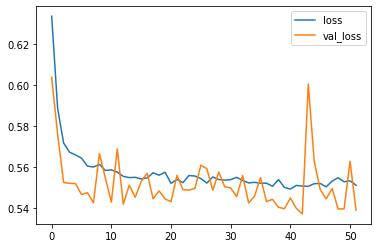

In [10]:
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df['val_loss'].min()))

Maximum AUC: 0.7678091526031494


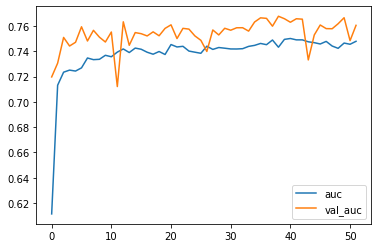

In [11]:
history_df.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df['val_auc'].max()))

Maximum validation binary accuracy: 0.7455630302429199


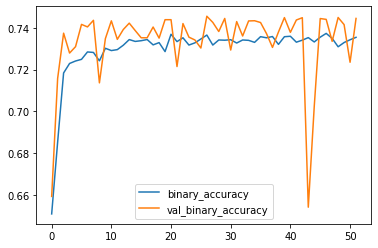

In [12]:
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df['val_binary_accuracy'].max()))

In [13]:
preds1 = table2_nn.predict(val_X)
preds1

array([[0.27440238],
       [0.2677017 ],
       [0.26639366],
       ...,
       [0.2654546 ],
       [0.37746143],
       [0.2675304 ]], dtype=float32)

In [14]:
len(preds1[preds1 < 0.5])

14969

In [15]:
len(preds1[preds1 >= 0.5])

7193

In [16]:
len(val_y)

22162